# Analítica Web

## Analítica en el Aprendizaje

#### Alba Márquez Rodríguez

# Carga de Datos

In [1]:
# Datos
import pandas as pd
import numpy as np
# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
# Dataset
from ucimlrepo import fetch_ucirepo 

In [2]:
# Cargar Dataset 
student_performance = fetch_ucirepo(id=320) 

# Cargar los datos
X = student_performance.data.features 
y = student_performance.data.targets 

In [3]:
# Visualizar la cabecera de los datos
df = pd.concat([X, y], axis=1)
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [4]:
# Mostrar count de los diferentes valores de G1, G2 y G3
print(df['G1'].value_counts())
print(df['G2'].value_counts())
print(df['G3'].value_counts())

G1
10    95
11    91
12    82
13    72
14    71
9     65
8     42
15    35
7     33
16    22
17    16
6      9
18     7
5      5
4      2
0      1
19     1
Name: count, dtype: int64
G2
11    103
12     86
10     83
13     80
9      72
14     54
8      40
15     38
16     25
17     20
7      16
18     14
6       7
0       7
5       3
19      1
Name: count, dtype: int64
G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64


Los valores de las notas van de 0 a 19, siendo 10 el aprobado.

# Preprocesamiento de datos

Un preprocesamiento interesante sería calcular la nota media del curso.

Las notas pueden ser discretizadas y así para de valor numérico a binario (0 - 1) en suspenso (<10) y aprobado (>=10).

In [5]:
# Nota media del curso
df['G_avg'] = (df['G1'] + df['G2'] + df['G3']) / 3

# Discretizar G_avg en aprobado (1) y suspenso (0)
df['G_pass'] = df['G_avg'].apply(lambda x: 1 if x >= 10 else 0)

# Nivel de apoyo educativo en el hogar
df['parent_education_support'] = (df['Medu'] + df['Fedu']) / 2

# Nivel de consumo de alcohol total
df['total_alcohol'] = df['Dalc'] + df['Walc']

print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  Walc health  absences  G1  G2  G3      G_avg G_pass  \
0    1      3         4   0  11  11   7.333333      0   
1    1      3         2   9  11  11  10.333333      1   
2    3      3         6  12  13  12  12.333333      1   
3    1      5         0  14  14  14  14.000000      1   
4    2      5         0  11  13  13  12.333333      1   

  parent_education_support total_alcohol  
0                      4.0             2  
1                      1.0             2  
2                      1.0             5 

# Gráficas de Resultados


### Porcentaje de aprobados y suspensos
Este gráfico de tarta muestra visualmente la proporción de estudiantes que han aprobado (1) y suspendido (0) en el conjunto de datos. Cada sector del gráfico representa el porcentaje de estudiantes en cada categoría, con etiquetas que indican si el sector corresponde a aprobados o suspensos.

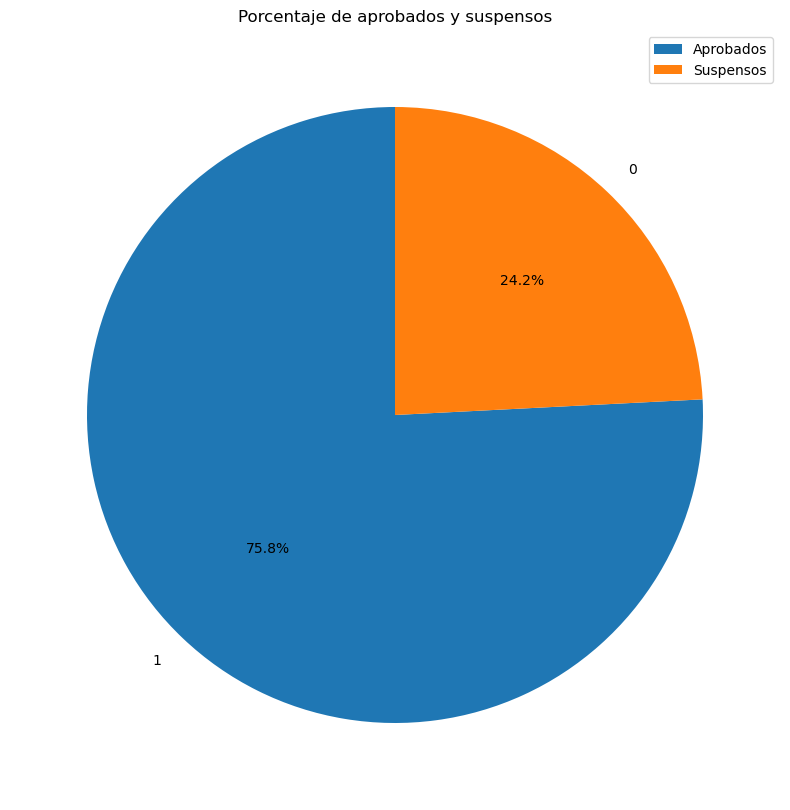

In [6]:
# Gráfico de tarta aprobados y suspensos - 1 = aprobado, 0 = suspenso
plt.figure(figsize=(10, 10))
df['G_pass'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

plt.title('Porcentaje de aprobados y suspensos')

# Leyenda 1 = aprobados, 0 = suspensos
plt.legend(['Aprobados', 'Suspensos'])

plt.ylabel('') # Quitar etiqueta del eje y

plt.show()

### Número de estudiantes por nota media final
Este gráfico de barras muestra la distribución del número de estudiantes en función de su nota media final. Cada barra representa una nota media final específica, y la altura de la barra indica cuántos estudiantes obtuvieron esa nota. La línea roja discontinua marca la nota de corte (10.0), dividiendo visualmente las notas aprobadas de las suspendidas.

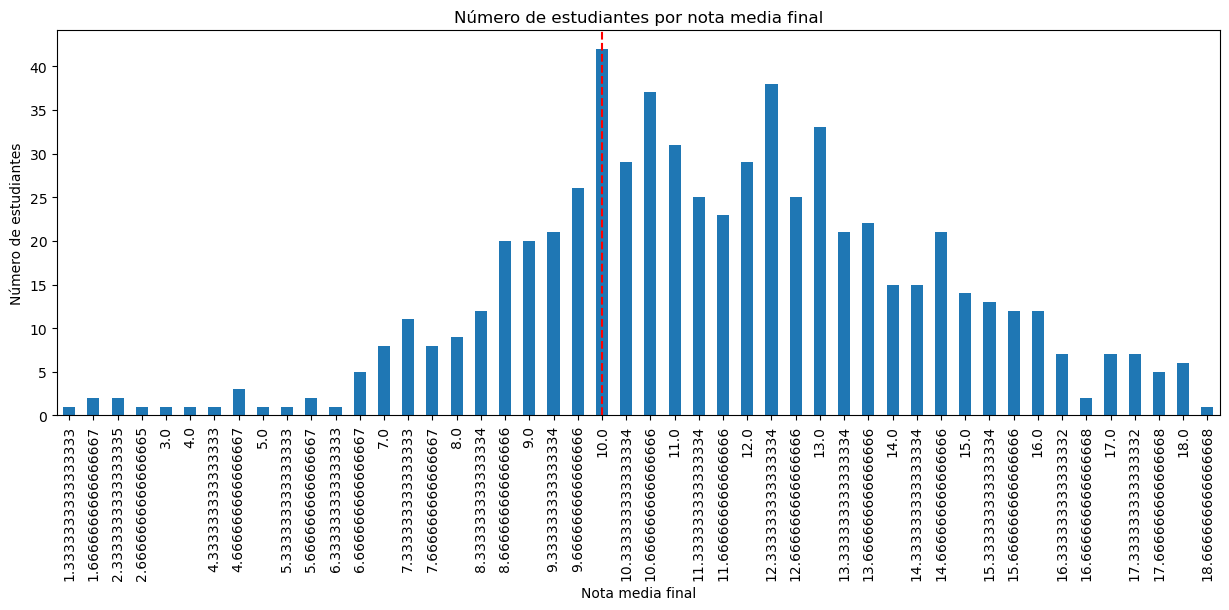

In [7]:
# Gráfico de barras de las notas finales
plt.figure(figsize=(15, 5))
df['G_avg'].value_counts().sort_index().plot.bar()

plt.title('Número de estudiantes por nota media final')
plt.xlabel('Nota media final')
plt.ylabel('Número de estudiantes')

# Eje vertical discontinuo en nota de corte nota media final == 10.0
plt.axvline(x=22, color='red', linestyle='--')

plt.grid(False) # Quitar grid
plt.show()

### Histograma de las notas finales
Este histograma muestra la distribución de las notas medias finales de los estudiantes. El eje x representa las diferentes notas medias posibles, mientras que el eje y indica el número de estudiantes que obtuvieron cada nota. La línea roja discontinua marca la nota de corte entre aprobar y suspender (10.0), lo que permite identificar visualmente cómo se distribuyen las notas en relación con este umbral.

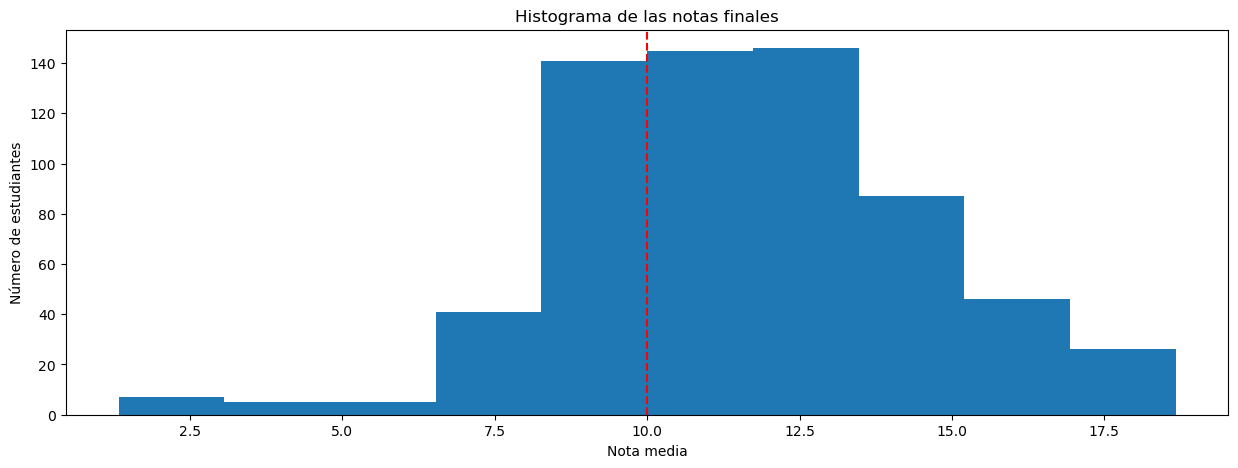

In [8]:
# Histograma de las notas finales
plt.figure(figsize=(15, 5))
df['G_avg'].hist()

plt.title('Histograma de las notas finales')
plt.xlabel('Nota media')
plt.ylabel('Número de estudiantes')

# Línea vertical en la nota de corte suspenso-aprobado
plt.axvline(x=10, color='red', linestyle='--')

plt.grid(False) # Quitar grid
plt.show()

### Relación entre apoyo educativo en el hogar y nota media final
Este diagrama de dispersión muestra la relación entre el nivel de apoyo educativo en el hogar y la nota media final de los estudiantes. Cada punto en el gráfico representa a un estudiante, donde el eje x representa la nota media del curso y el eje y representa el nivel de apoyo educativo en el hogar. Los puntos están coloreados de verde si la nota media es mayor o igual a 10 (aprobado) y de rojo si es menor a 10 (suspenso), lo que permite identificar visualmente cualquier patrón o tendencia en la relación entre estas dos variables.

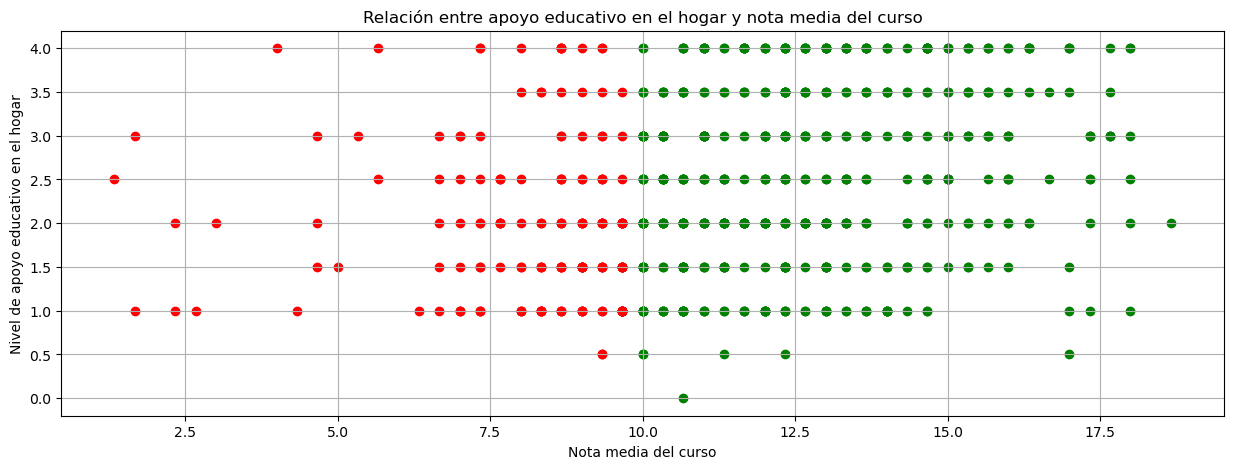

In [9]:
# Diagrama de dispersión (Scatter plot) del apoyo educativo del hogar y nota media final
plt.figure(figsize=(15, 5))
sns.scatterplot(x='G_avg', y='parent_education_support', data=df)

# Si nota media >= 10, colorear de verde, si no, de rojo
plt.scatter(df[df['G_avg'] >= 10]['G_avg'], df[df['G_avg'] >= 10]['parent_education_support'], color='green')
plt.scatter(df[df['G_avg'] < 10]['G_avg'], df[df['G_avg'] < 10]['parent_education_support'], color='red')

plt.title('Relación entre apoyo educativo en el hogar y nota media del curso')
plt.ylabel('Nivel de apoyo educativo en el hogar')
plt.xlabel('Nota media del curso')

plt.grid(True)
plt.show()

### Relación entre consumo total de alcohol y nota media final
En este diagrama de dispersión se muestra la relación entre el consumo total de alcohol y la nota media final de los estudiantes. Cada punto representa a un estudiante, donde el eje x representa la nota media del curso y el eje y representa el consumo total de alcohol. Los puntos están coloreados de verde si la nota media es mayor o igual a 10 (aprobado) y de rojo si es menor a 10 (suspenso), permitiendo visualizar cualquier asociación entre estas dos variables.

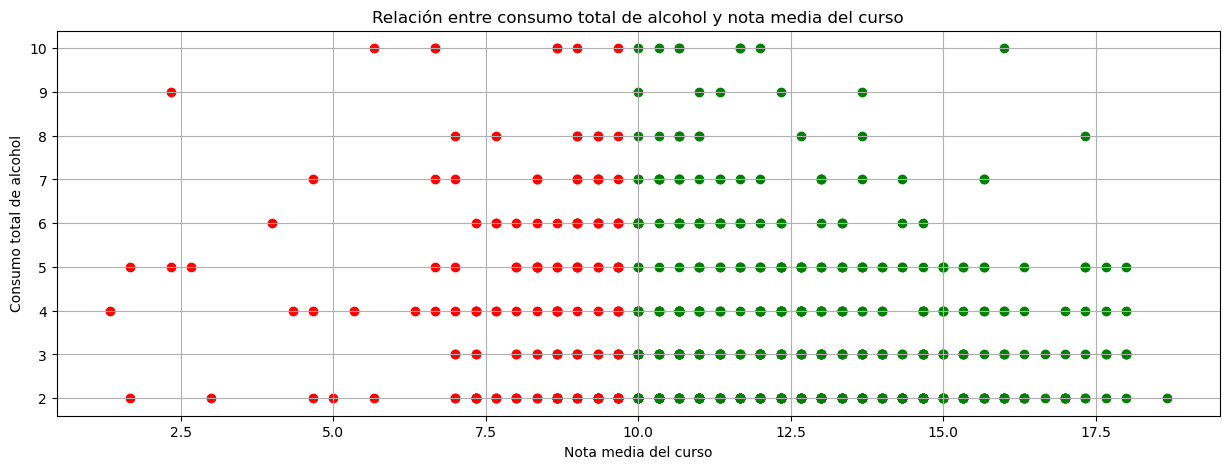

In [10]:
# Diagrama de dispersión (Scatter plot) del consumo total de alcohol y nota media final
plt.figure(figsize=(15, 5))
sns.scatterplot(x='G_avg', y='total_alcohol', data=df)

# Si nota media >= 10, colorear de verde, si no, de rojo
plt.scatter(df[df['G_avg'] >= 10]['G_avg'], df[df['G_avg'] >= 10]['total_alcohol'], color='green')
plt.scatter(df[df['G_avg'] < 10]['G_avg'], df[df['G_avg'] < 10]['total_alcohol'], color='red')

plt.title('Relación entre consumo total de alcohol y nota media del curso')
plt.ylabel('Consumo total de alcohol')
plt.xlabel('Nota media del curso')

plt.grid(True)
plt.show()

### Relación entre ausencias, consumo total de alcohol y aprobación
Este diagrama de dispersión muestra la relación entre el número de ausencias, el consumo total de alcohol y si los estudiantes han aprobado o no. Cada punto representa a un estudiante, donde el eje x representa el número de ausencias, el eje y representa el consumo total de alcohol y el color indica si el estudiante ha aprobado (verde) o suspendido (rojo). Esto permite visualizar cualquier asociación entre estas variables y el rendimiento académico.

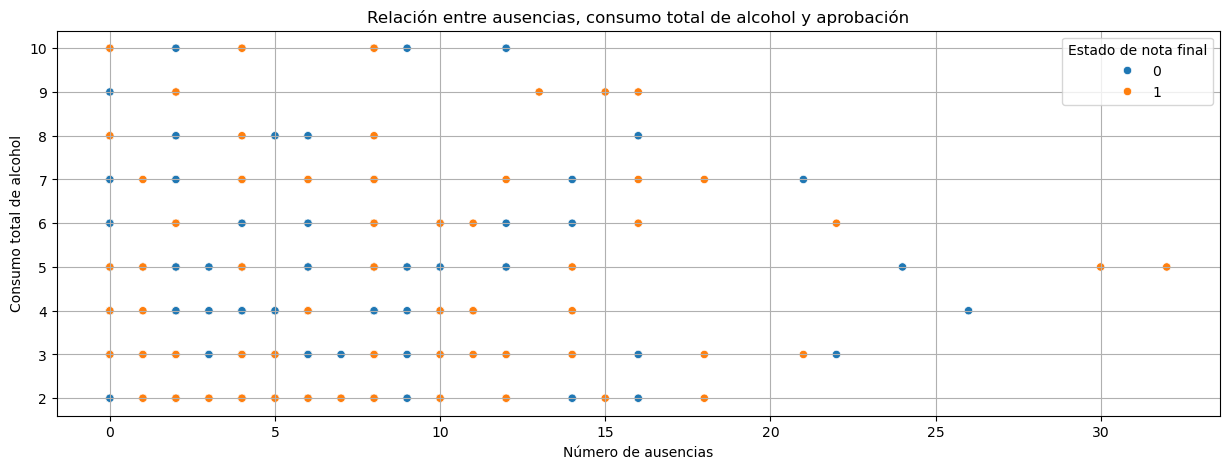

In [11]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='absences', y='total_alcohol', data=df, hue='G_pass')

plt.title('Relación entre ausencias, consumo total de alcohol y aprobación')
plt.xlabel('Número de ausencias')
plt.ylabel('Consumo total de alcohol')

plt.legend(title='Estado de nota final')

plt.grid(True)
plt.show()

### Distribución de la nota media del curso por género
Este gráfico de caja muestra la distribución de la nota media del curso para cada género. Los boxplots representan la mediana, los cuartiles y los valores atípicos de las notas medias para cada grupo de género. Esto permite comparar la distribución de las notas entre géneros y identificar posibles diferencias en el rendimiento académico.

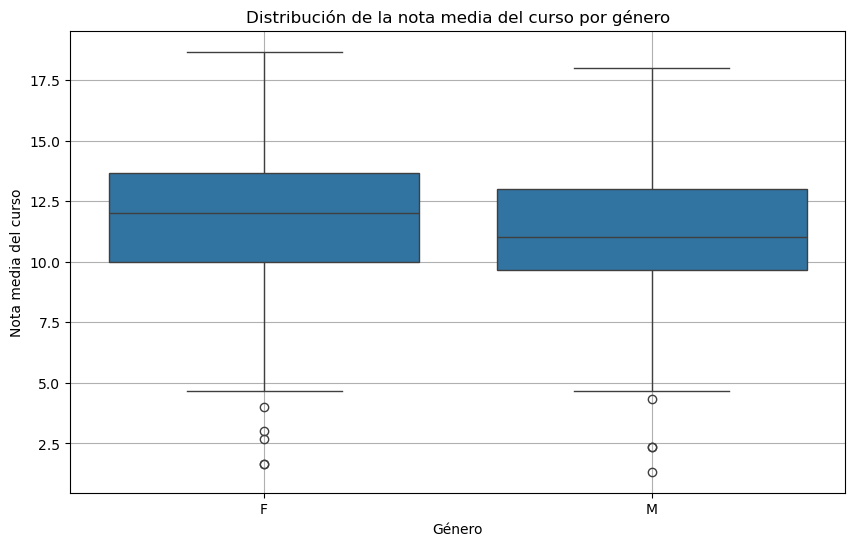

In [12]:
# Gráfico de caja (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='G_avg', data=df)

plt.title('Distribución de la nota media del curso por género')
plt.xlabel('Género')
plt.ylabel('Nota media del curso')

plt.grid(True)
plt.show()

### Distribución de aprobados y suspensos por escuela
Este gráfico de barras muestra la distribución del número de estudiantes aprobados y suspendidos para cada escuela. Cada barra está dividida en dos colores, representando el número de estudiantes que aprobaron (verde) y suspendieron (rojo) en cada escuela. Esto permite comparar la proporción de estudiantes aprobados y suspendidos entre las diferentes escuelas.

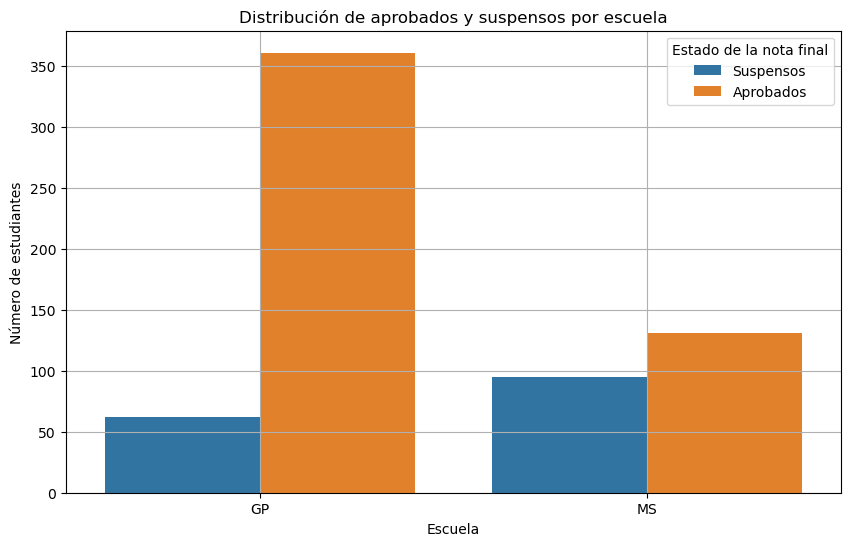

In [13]:
# Distribución de aprobados y suspensos por escuela
plt.figure(figsize=(10, 6))
sns.countplot(x='school', hue='G_pass', data=df)

plt.title('Distribución de aprobados y suspensos por escuela')
plt.xlabel('Escuela')
plt.ylabel('Número de estudiantes')

plt.legend(title='Estado de la nota final', labels=['Suspensos', 'Aprobados'])

plt.grid(True)
plt.show()

### Distribución de notas según estado de nota final
Este gráfico de densidad muestra la distribución de las notas medias del curso según el estado de la nota final (aprobado o suspendido). La curva de densidad de color verde representa las notas de los estudiantes aprobados, mientras que la curva de densidad de color rojo representa las notas de los estudiantes suspendidos. Esto permite visualizar la diferencia en la distribución de las notas entre los estudiantes aprobados y suspendidos.

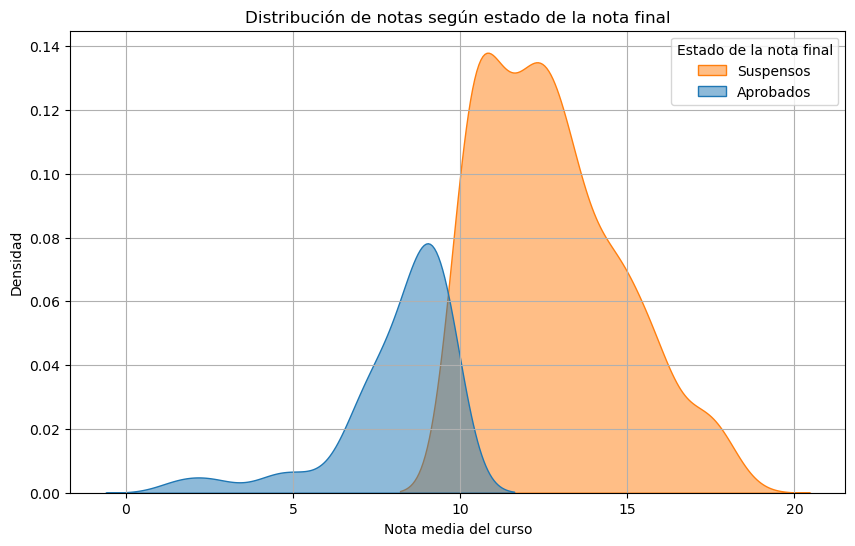

In [14]:
# Distribución de notas según estado de nota final
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='G_avg', hue='G_pass', fill=True, alpha=0.5)

plt.title('Distribución de notas según estado de la nota final')
plt.xlabel('Nota media del curso')
plt.ylabel('Densidad')

plt.legend(title='Estado de la nota final', labels=['Suspensos', 'Aprobados'])

plt.grid(True)
plt.show()